In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import os
import sys
import pathlib
import pickle

sys.path.append('..')

In [4]:
import seaborn as sns
import matplotlib.style as style

In [5]:
from pals.evaluation import evaluate_performance
from pals.common import *

In [6]:
style.use('seaborn-poster') # sets the size of the charts
sns.set_context('poster') # everything is larger

# HAT Data Evaluation

In [7]:
results = load_obj(os.path.join('test_data', 'HAT_results.p'))

2019-11-29 13:38:13.995 | WARNING  | pals.reactome:get_neo4j_driver:14 - Using a default neo4j server: bolt://localhost:7687
2019-11-29 13:38:13.995 | WARNING  | pals.reactome:get_neo4j_driver:19 - Using a default neo4j username or password: neo4j
2019-11-29 13:38:15.092 | INFO     | pals.reactome:get_neo4j_driver:24 - Created graph database driver for bolt://localhost:7687 (neo4j)


### Plasma

In [8]:
experiment_name = 'plasma'
threshold = 0.05
N = 20
df = evaluate_performance(results, experiment_name, threshold, N)
df

2019-11-29 13:38:15.574 | DEBUG    | pals.evaluation:evaluate_performance:24 - Generating PALS full results
2019-11-29 13:38:15.579 | DEBUG    | pals.pathway_analysis:_change_zero_peak_ints:248 - Setting the zero intensity values in the dataframe
2019-11-29 13:38:15.683 | DEBUG    | pals.pathway_analysis:_standardize_intensity_df:229 - Scaling the data across the sample: zero mean and unit variance
2019-11-29 13:38:15.746 | DEBUG    | pals.pathway_analysis:get_plage_activity_df:68 - Mean values of the rows in the DF is [ 0. -0.  0. ... -0. -0. -0.]
2019-11-29 13:38:15.747 | DEBUG    | pals.pathway_analysis:get_plage_activity_df:69 - Variance in the rows of the DF is [1. 1. 1. ... 1. 1. 1.]
2019-11-29 13:38:17.860 | INFO     | pals.pathway_analysis:set_up_resample_plage_p_df:80 - Calculating plage p-values with resampling
2019-11-29 13:38:17.860 | DEBUG    | pals.pathway_analysis:set_up_resample_plage_p_df:84 - Comparison Stage2/Stage1
2019-11-29 13:38:17.861 | DEBUG    | pals.pathway_a

,method,n_sample,i,TP,FP,FN,precision,recall,F1
0,pals,4,0,3,11,17,0.214286,0.15,0.176471
1,pals,4,1,5,3,15,0.625000,0.25,0.357143
2,pals,4,2,3,1,17,0.750000,0.15,0.250000
3,pals,4,3,0,10,20,0.000000,0.00,0.000000
4,pals,4,4,3,1,17,0.750000,0.15,0.250000
...,...,...,...,...,...,...,...,...,...
295,pals,12,95,15,3,5,0.833333,0.75,0.789474
296,pals,12,96,15,5,5,0.750000,0.75,0.750000
297,pals,12,97,16,4,4,0.800000,0.80,0.800000
298,pals,12,98,13,7,7,0.650000,0.65,0.650000


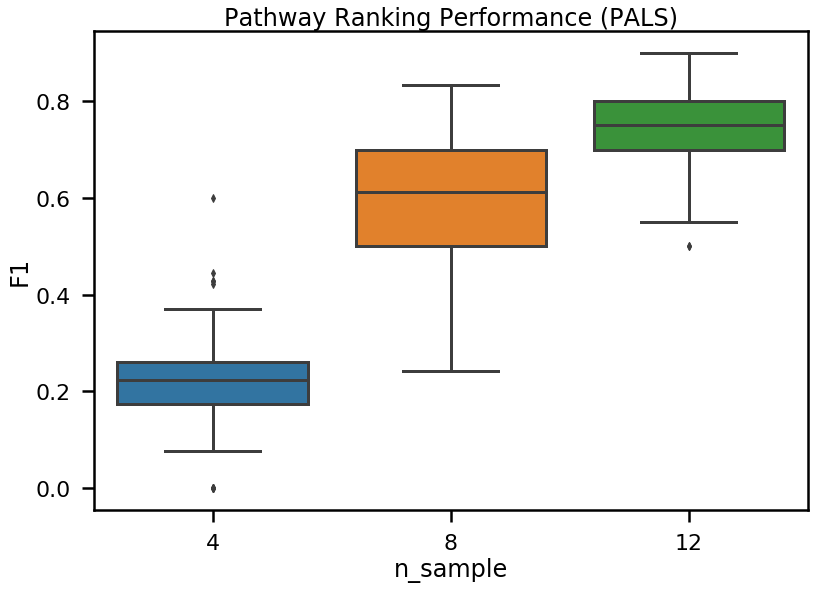

In [9]:
sns.boxplot(x='n_sample', y='F1', data=df)
plt.title('Pathway Ranking Performance (PALS)')
plt.savefig('evaluation_plasma.eps', dpi=300)

### CSF

In [10]:
experiment_name = 'csf'
threshold = 0.05
N = 20
df = evaluate_performance(results, experiment_name, threshold, N)
df

2019-11-29 13:38:23.031 | DEBUG    | pals.evaluation:evaluate_performance:24 - Generating PALS full results
2019-11-29 13:38:23.034 | DEBUG    | pals.pathway_analysis:_change_zero_peak_ints:248 - Setting the zero intensity values in the dataframe
2019-11-29 13:38:23.090 | DEBUG    | pals.pathway_analysis:_standardize_intensity_df:229 - Scaling the data across the sample: zero mean and unit variance
2019-11-29 13:38:23.120 | DEBUG    | pals.pathway_analysis:get_plage_activity_df:68 - Mean values of the rows in the DF is [ 0.  0.  0. ... -0. -0. -0.]
2019-11-29 13:38:23.121 | DEBUG    | pals.pathway_analysis:get_plage_activity_df:69 - Variance in the rows of the DF is [1. 1. 1. ... 1. 1. 1.]
2019-11-29 13:38:25.059 | INFO     | pals.pathway_analysis:set_up_resample_plage_p_df:80 - Calculating plage p-values with resampling
2019-11-29 13:38:25.059 | DEBUG    | pals.pathway_analysis:set_up_resample_plage_p_df:84 - Comparison Stage_1/Stage_2
2019-11-29 13:38:25.060 | DEBUG    | pals.pathway

,method,n_sample,i,TP,FP,FN,precision,recall,F1
0,pals,4,0,1,10,19,0.090909,0.05,0.064516
1,pals,4,1,8,7,12,0.533333,0.40,0.457143
2,pals,4,2,1,4,19,0.200000,0.05,0.080000
3,pals,4,3,4,1,16,0.800000,0.20,0.320000
4,pals,4,4,5,15,15,0.250000,0.25,0.250000
...,...,...,...,...,...,...,...,...,...
295,pals,12,95,14,6,6,0.700000,0.70,0.700000
296,pals,12,96,7,13,13,0.350000,0.35,0.350000
297,pals,12,97,11,9,9,0.550000,0.55,0.550000
298,pals,12,98,13,7,7,0.650000,0.65,0.650000


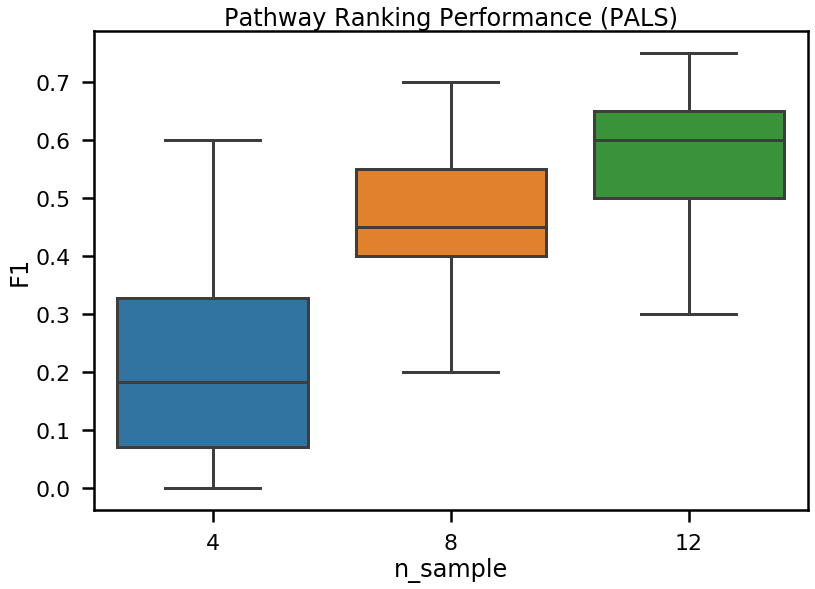

In [11]:
sns.boxplot(x='n_sample', y='F1', data=df)
plt.title('Pathway Ranking Performance (PALS)')
plt.savefig('evaluation_csf.eps', dpi=300)